<a href="https://colab.research.google.com/github/DangerDR0519/NeuralNetworks/blob/main/ICP-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6929 - val_loss: 0.6928
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


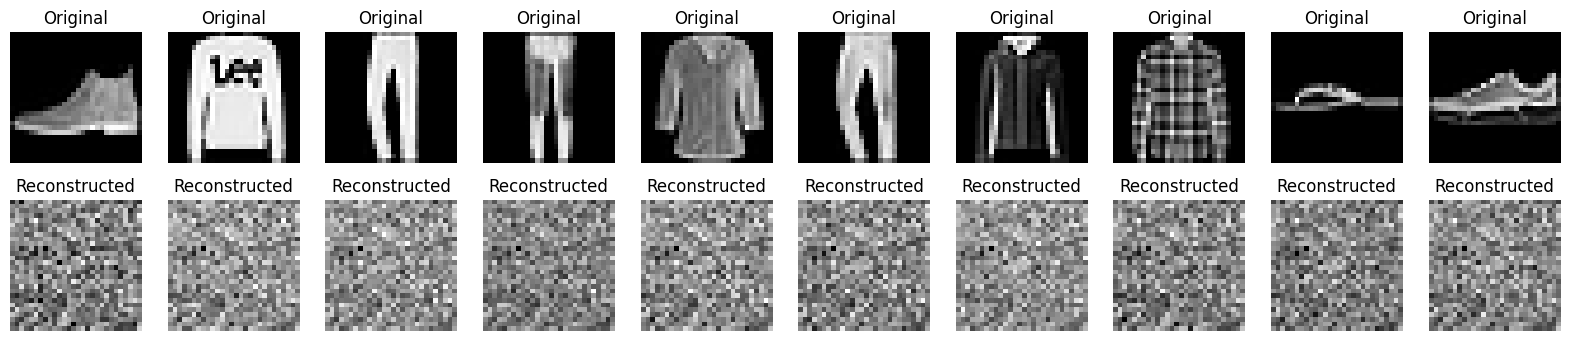

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

# Define the size of the encoded representations
encoding_dim = 64  # Compression factor, larger than before

# Input placeholder
input_img = Input(shape=(784,))

# Add extra hidden layer to the encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Compressed layer

# Decoder layer to reconstruct the image
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Reconstructed output

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Prediction (Reconstruction) on the test data
reconstructed_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
def visualize_reconstruction(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Visualize 10 images
visualize_reconstruction(x_test, reconstructed_imgs, n=10)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6965 - val_loss: 0.6962
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6962 - val_loss: 0.6959
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6959 - val_loss: 0.6957
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6956 - val_loss: 0.6954
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6954 - val_loss: 0.6951
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6951 - val_loss: 0.6949
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6949 - val_loss: 0.6947
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6942 - val_loss: 0.6940
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


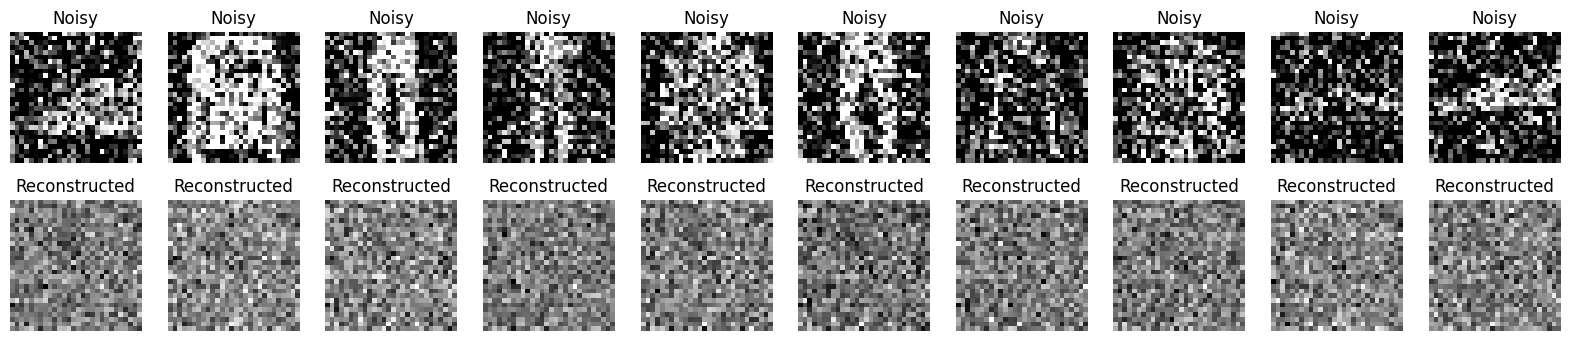

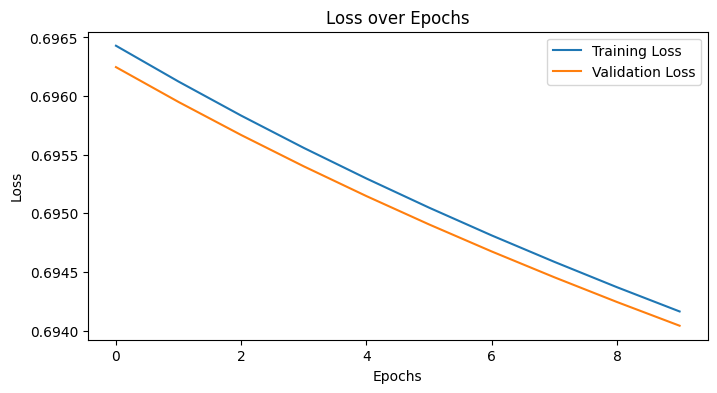

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np

# Define the size of the encoded representations
encoding_dim = 32  # Compression factor

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clipping the values to stay within the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder and store the history
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Predicting on the noisy test data
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Visualizing original noisy vs reconstructed images
def visualize_reconstruction(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original noisy image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        # Display reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Visualize 10 images
visualize_reconstruction(x_test_noisy, reconstructed_imgs, n=10)

# Plotting loss
def plot_history(history):
    plt.figure(figsize=(8, 4))
    # Plot loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss curves
plot_history(history)
